In [ ]:
#  Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')

#  Show large numbers like 2500000 instead of 2.5e+06
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#  Sample Housing Dataset (Nepali Format)
data = pd.DataFrame({
    'Location': ['Biratnagar', 'Pokhara','Kathmandu', 'Lalitpur', 'Bhaktapur' ],
    'Rooms': [3, 4, 5, 7, 6],
    'Area_sqft': [1200, 1500, 2000, 1000, 2500],  # in sq. ft.
    'House_Type': ['Apartment', 'House', 'Villa', 'Apartment', 'Bngla']
})

#  Convert Area to Aana (1 aana = 342.25 sq.ft.)
data['Area_aana'] = data['Area_sqft'] / 342.25

#  Generate Price with avg price/room = ~25,000–30,000 + 25 lakh bump
np.random.seed(42)
base_price = data['Rooms'] * np.random.randint(20000, 30000, size=len(data))
data['Price_NPR'] = base_price  # add 25 lakhs
data['Price_per_room'] = data['Price_NPR'] / data['Rooms']

# Display dataset
print("📋 Nepali Housing Dataset")
display(data)


📋 Nepali Housing Dataset


,Location,Rooms,Area_sqft,House_Type,Area_aana,Price_NPR,Price_per_room
0,Biratnagar,3,1200,Apartment,4,81810,27270
1,Pokhara,4,1500,House,4,83440,20860
2,Kathmandu,5,2000,Villa,6,126950,25390
3,Lalitpur,7,1000,Apartment,3,176337,25191
4,Bhaktapur,6,2500,Bngla,7,154404,25734


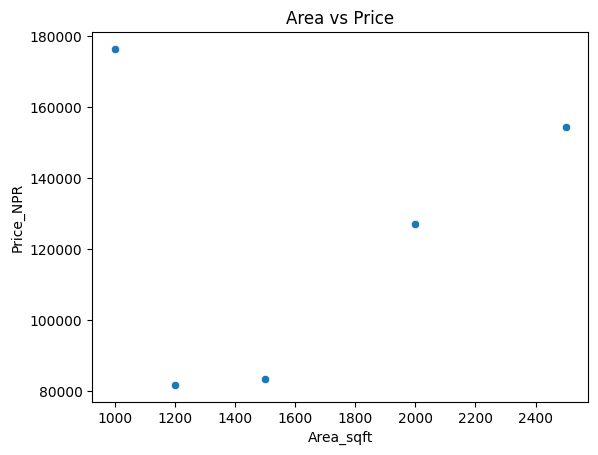

R² Score: nan
RMSE: 34487.799999999945
   Actual Price  Predicted Price  Difference
0         83440           117928      -34488
Predicted Price for new house: 114147.99999999994


In [49]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset
data = {
    'Rooms': [3, 4, 5, 7, 6],
    'Area_sqft': [1200, 1500, 2000, 1000, 2500],
    'Area_aana': [4, 4, 6, 3, 7],
    'Price_NPR': [81810, 83440, 126950, 176337, 154404]
}

df = pd.DataFrame(data)

# EDA - Scatter Plot
sns.scatterplot(x='Area_sqft', y='Price_NPR', data=df)
plt.title("Area vs Price")
plt.show()

# Train-test split
X = df[['Rooms', 'Area_sqft', 'Area_aana']]
y = df['Price_NPR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred,
    'Difference': y_test.values - y_pred
})
print(comparison_df)

# Predict for a new house
new_data = pd.DataFrame({'Rooms': [4], 'Area_sqft': [1800], 'Area_aana': [5]})
new_prediction = model.predict(new_data)[0]
print("Predicted Price for new house:", new_prediction)


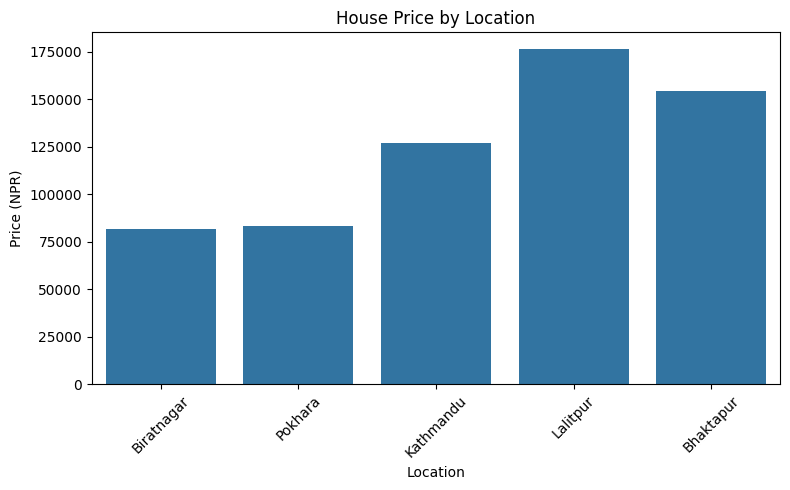

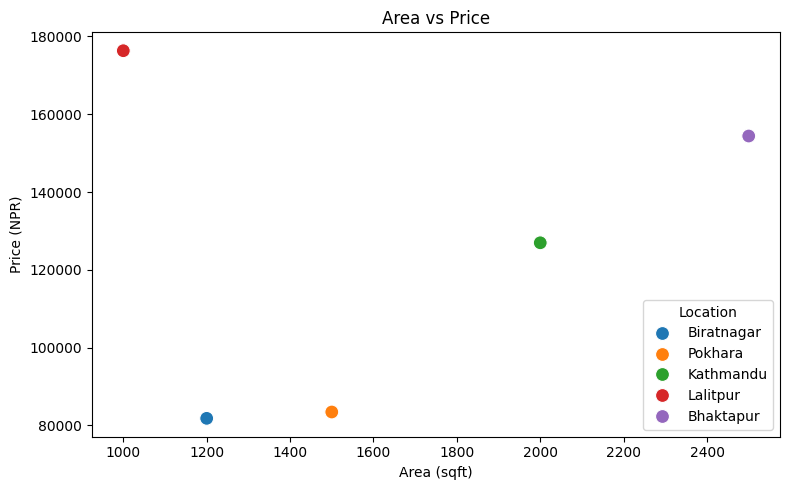

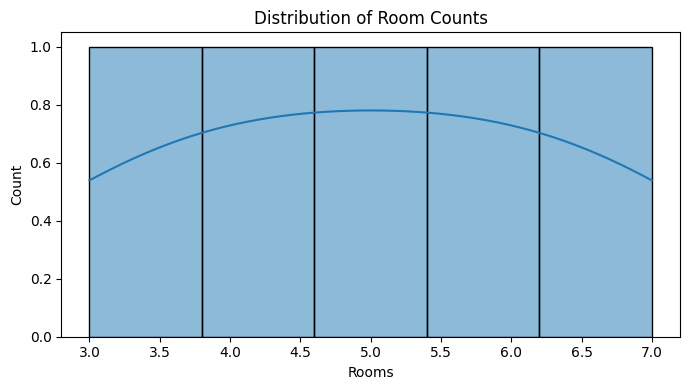

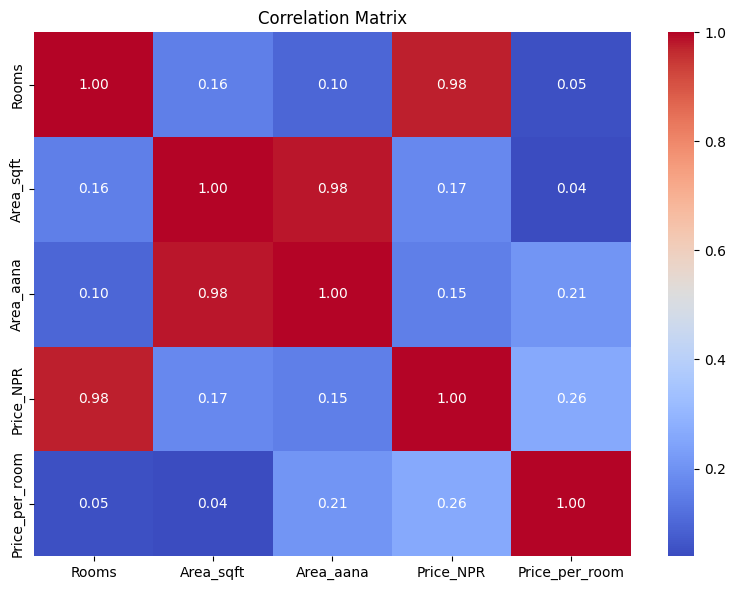

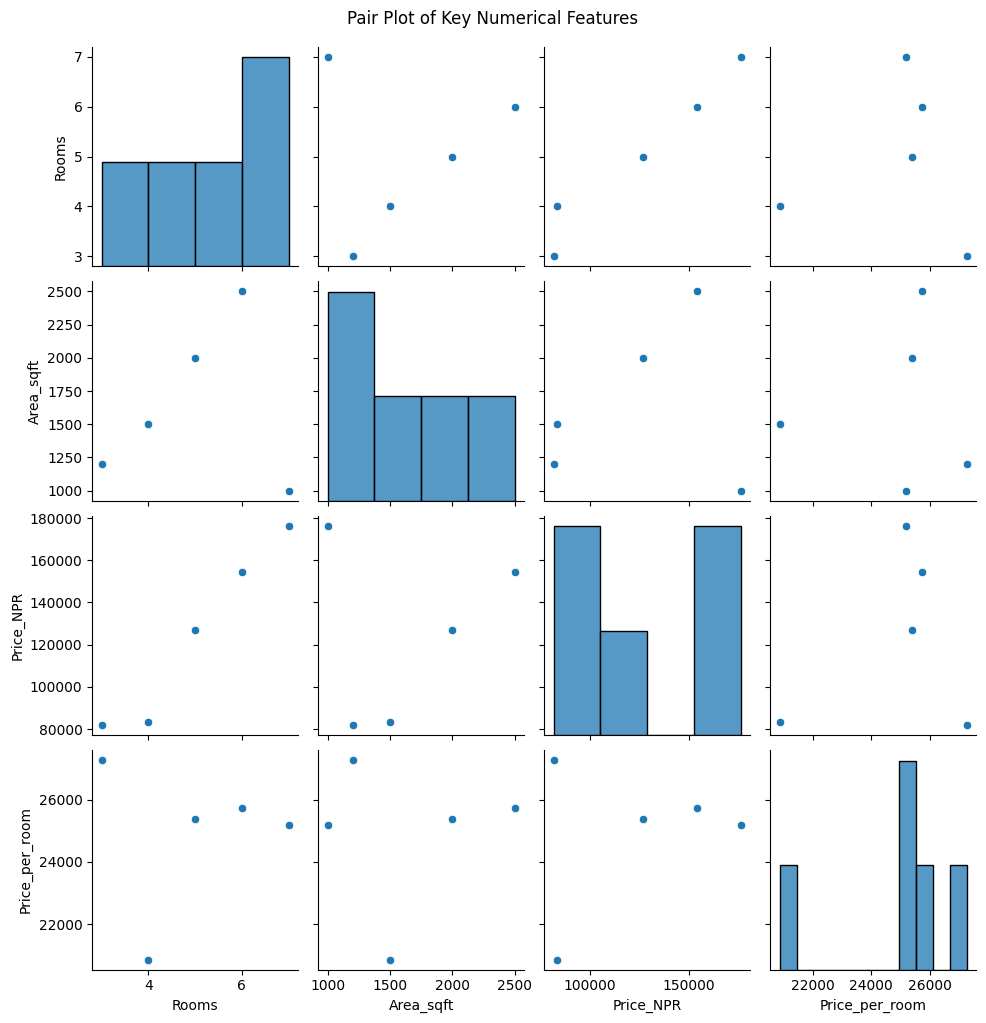

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame based on your image
data = {
    'Location': ['Biratnagar', 'Pokhara', 'Kathmandu', 'Lalitpur', 'Bhaktapur'],
    'Rooms': [3, 4, 5, 7, 6],
    'Area_sqft': [1200, 1500, 2000, 1000, 2500],
    'House_Type': ['Apartment', 'House', 'Villa', 'Apartment', 'Bngla'],
    'Area_aana': [4, 4, 6, 3, 7],
    'Price_NPR': [81810, 83440, 126950, 176337, 154404],
    'Price_per_room': [27270, 20860, 25390, 25191, 25734]
}

df = pd.DataFrame(data)

# ---------- Bar Plot: Price per location ----------
plt.figure(figsize=(8, 5))
sns.barplot(x='Location', y='Price_NPR', data=df)
plt.title('House Price by Location')
plt.ylabel('Price (NPR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- Scatter Plot: Area vs Price ----------
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Area_sqft', y='Price_NPR', hue='Location', data=df, s=100)
plt.title('Area vs Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (NPR)')
plt.tight_layout()
plt.show()

# ---------- Histogram: Distribution of Room Counts ----------
plt.figure(figsize=(7, 4))
sns.histplot(df['Rooms'], bins=5, kde=True)
plt.title('Distribution of Room Counts')
plt.xlabel('Rooms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ---------- Correlation Heatmap ----------
plt.figure(figsize=(8, 6))
corr_matrix = df[['Rooms', 'Area_sqft', 'Area_aana', 'Price_NPR', 'Price_per_room']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# ---------- Pair Plot ----------
sns.pairplot(df[['Rooms', 'Area_sqft', 'Price_NPR', 'Price_per_room']])
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()
